# WeatherPy

## Note
- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import gmaps

# Import API key
# Import API key
# Google developer API key
#from config import gkey
gkey = "e7e0d13fac94cc63762e78337ce4e575"
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



In [2]:
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={gkey}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")
    

City Name: tilichiki, City ID: 2120591
City Name: hermanus, City ID: 3366880
That record does not exist, searching for next record...
City Name: viedma, City ID: 3832899
City Name: vardo, City ID: 777019
City Name: ponta do sol, City ID: 2264557
City Name: kapaa, City ID: 5848280
City Name: punta arenas, City ID: 3874787
City Name: melo, City ID: 3441702
City Name: lodja, City ID: 211647
City Name: hobart, City ID: 2163355
City Name: ayan, City ID: 2027316
City Name: ushuaia, City ID: 3833367
City Name: lasa, City ID: 3175096
City Name: cusset, City ID: 3021993
That record does not exist, searching for next record...
City Name: okakarara, City ID: 3354876
City Name: locri, City ID: 2524371
City Name: salalah, City ID: 286621
City Name: luena, City ID: 3347719
City Name: tongren, City ID: 1792592
City Name: lagoa, City ID: 3372964
City Name: carnarvon, City ID: 2074865
City Name: busselton, City ID: 2075265
City Name: cidreira, City ID: 3466165
City Name: jamestown, City ID: 5122534
Cit

City Name: russell, City ID: 4047434
City Name: te anau, City ID: 2181625
City Name: terrace bay, City ID: 6162951
City Name: tromso, City ID: 6453316
City Name: taoudenni, City ID: 2450173
City Name: bengkulu, City ID: 1649150
City Name: okha, City ID: 2122614
City Name: ust-ishim, City ID: 1488206
City Name: vaitape, City ID: 4033077
City Name: zhanaozen, City ID: 607610
City Name: pamekasan, City ID: 1632978
City Name: camacha, City ID: 2270385
City Name: general salgado, City ID: 3462487
City Name: alofi, City ID: 4036284
City Name: maniitsoq, City ID: 3421982
City Name: port hedland, City ID: 2063042
City Name: faya, City ID: 110690
City Name: sandviken, City ID: 2680075
City Name: skibbereen, City ID: 2961459
City Name: vao, City ID: 2137773
City Name: abu dhabi, City ID: 292968
City Name: dubbo, City ID: 2168305
City Name: leningradskiy, City ID: 2123814
That record does not exist, searching for next record...
City Name: worland, City ID: 5843495
City Name: glen allen, City ID: 

City Name: airai, City ID: 1651810
City Name: ranong, City ID: 1150965
City Name: saint-joseph, City ID: 6690296
City Name: shimoda, City ID: 1852357
City Name: constantine, City ID: 2501152
City Name: coquimbo, City ID: 3893629
City Name: gravdal, City ID: 3155152
City Name: fereydun kenar, City ID: 134602
City Name: imbituba, City ID: 3461370
City Name: manadhoo, City ID: 1337618
City Name: usinsk, City ID: 863061
City Name: correntina, City ID: 3465373
City Name: nizhniy tsasuchey, City ID: 2019118
City Name: williams lake, City ID: 6182212
City Name: hudson bay, City ID: 5978133
City Name: baghmara, City ID: 1274553
City Name: anadyr, City ID: 2127202
City Name: gisborne, City ID: 2206854
City Name: raudeberg, City ID: 3146487
City Name: bolobo, City ID: 2316748
City Name: phonhong, City ID: 1655124
City Name: merritt, City ID: 6072350
City Name: mount gambier, City ID: 2156643
City Name: wesselsbron, City ID: 940424
City Name: henties bay, City ID: 3356832
City Name: poykovskiy, C

City Name: mayya, City ID: 2020121
City Name: bogorodskoye, City ID: 575521
City Name: nelson bay, City ID: 2155562
City Name: san luis, City ID: 3837056
City Name: myre, City ID: 3145148
City Name: sambava, City ID: 1056899
City Name: guanica, City ID: 4565090
City Name: abu samrah, City ID: 172515
City Name: saint-augustin, City ID: 6137462
City Name: tamasane, City ID: 933030
City Name: gavrilovka vtoraya, City ID: 561804
City Name: flin flon, City ID: 5954718
City Name: sorata, City ID: 3904043
City Name: oranjemund, City ID: 3354071
City Name: laguna, City ID: 5364271
City Name: dicabisagan, City ID: 1715015


### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [5]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()


,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,2120591,Tilichiki,RU,60.4667,166.1000,-1.26,84,100,7.58
1,3366880,Hermanus,ZA,-34.4187,19.2345,67.80,70,0,19.73
2,3832899,Viedma,AR,-40.8135,-62.9967,60.53,70,100,18.84
3,777019,Vardø,NO,70.3705,31.1107,21.94,90,100,27.09
4,2264557,Ponta do Sol,PT,32.6667,-17.1000,59.56,69,74,5.28


In [6]:
# Export to .csv file
cities_df.to_csv("weather.csv", index=False, header=True)

## Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

###   Temperature (F) vs.Latitude
- This plot is looking at the relationship between latitude and temperature. It shows that as you aproach the equator (latitude 0) the temperature rises (It gets hotter).

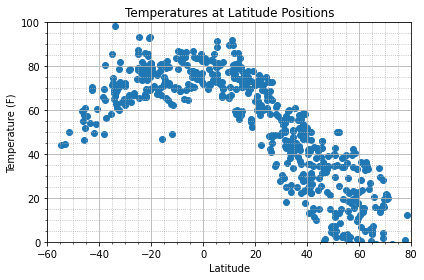

<Figure size 432x288 with 0 Axes>

In [7]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_temp.png")

###  Humidity (%) vs. Latitude 
- This plot is looking at the relationship between humidity and latitude. It shows that there is not much of a correlation between humidity and latitude.


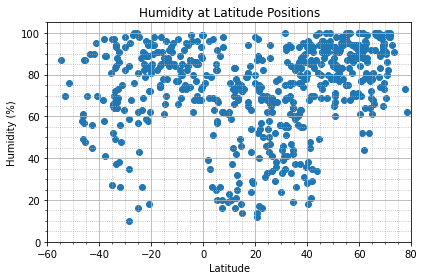

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_humid.png")

### Cloudiness (%) vs. Latitude
- This plot is looking at the relationship between latitude and cloudiness. This also shows that there does not seem to be much of a correlation between latitude and cloudiness.

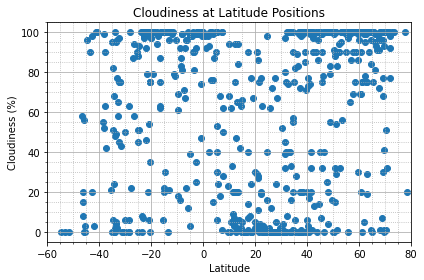

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_clouds.png")

### Wind Speed  vs. Latitude
- This plot is looking at the relationship between latitude and wind speed. It shows that wind speeds are generally increases as you move farther away from the equator (latitude 0).


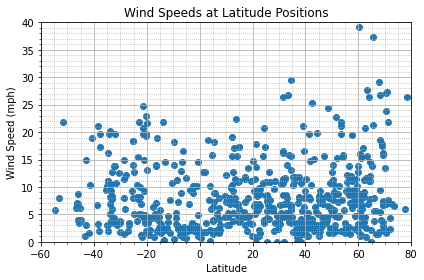

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("lat_wind.png")

### Linear Regression

In [11]:
# Create a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation: {correlation}")
    print(f"Line: {line_eq}")
    return regress_values, line_eq

In [12]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

### Northern Hemisphere -Temparature vs. Latitude 

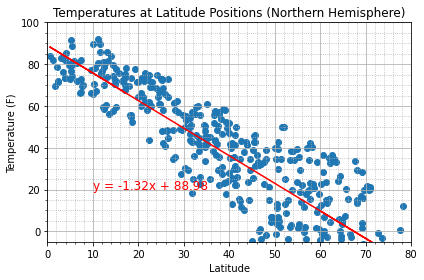

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_temp_regression.png")

### Southern Hemisphere - Temparature vs. Latitude 

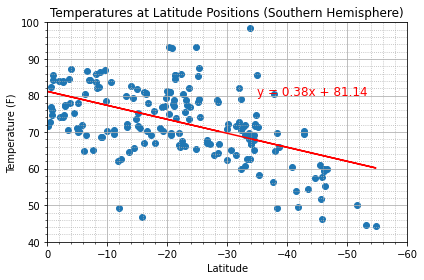

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("sh_lat_temp_regression.png")

## Temparature vs. Latitude Linear Regressions
- Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.
Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

### Northern Hemisphere - Humidity (%) vs. Latitude  

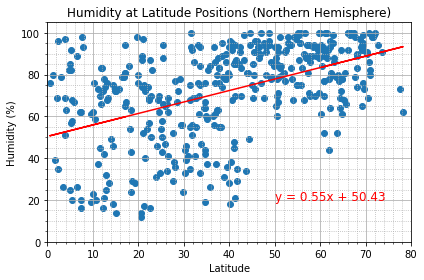

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_humid_regression.png")

### Southern Hemisphere - Humidity (%) vs. Latitude 

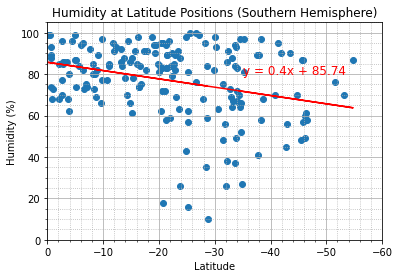

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("sh_lat_humid_regression.png")

## Humidity (%) vs. Latitude Linear Regressions
- There is no strong correlation between humidity and latitude. However, there is a slight positive correlation in the Northern Hemisphere and negative correlation in the Southern Hemisphere.
- In the Northern Hemisphere, as you get further away from the equator (latitude 0), humidity increases. 
- In the Southern Hemisphere, humidity decreases as you get further away from the equator.

### Northern Hemisphere - Cloudiness (%) vs. Latitude 

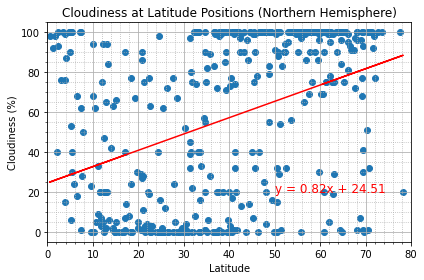

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_clouds_regression.png")

### Southern Hemisphere - Cloudiness (%) vs. Latitude 

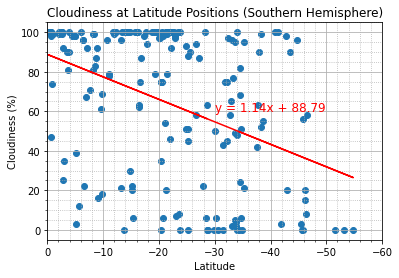

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("sh_lat_clouds_regression.png")

### Cloudiness vs. Latitude Linear Regression
- There is no correlation between cloudiness and latitude when you look at the plots. However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.
Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

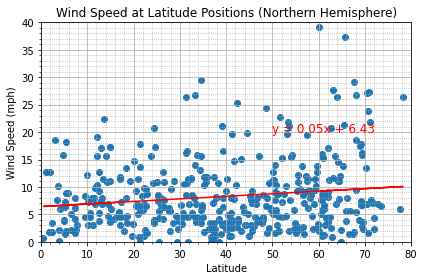

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("nh_lat_wind_regression.png")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


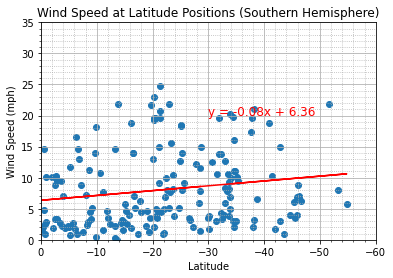

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("sh_lat_wind_regression.png")

### Wind speed vs. Latitude Linear regression
- There does seem to be a pretty strong correlation between wind speed and latitude. However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, but the slope of the regression line is much shallower than I was expecting looking at the plots.